In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.linear_model as skl
%matplotlib inline

In [208]:
data_test = pd.read_csv("../data/prepared_test.csv", sep=";", index_col=0
                        ).sort_index()
data_test.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
7,07.01.2011,1,0,1,0,5,1,2,7.86,0.21,74.80,0.17,977,0,148,1362,1510
11,11.01.2011,1,0,1,0,2,1,2,6.76,0.19,102.95,0.12,1028,0,43,1220,1263
14,14.01.2011,1,0,1,0,5,1,1,6.43,0.19,80.67,0.13,481,0,54,1367,1421
16,16.01.2011,1,0,1,0,0,0,1,9.27,0.23,72.56,0.19,493,0,251,953,1204
18,18.01.2011,1,0,1,0,2,1,2,8.67,0.23,129.25,0.15,989,0,9,674,683


In [209]:
data_train = pd.read_csv("../data/prepared_train.csv",sep=";", index_col=0
                         ).sort_index()
data_train.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1,0,1,0,6,0,2,13.77,0.36,120.87,0.16,755,0,331,654,985
2,02.01.2011,1,0,1,0,0,0,2,14.54,0.35,104.41,0.25,837,1,131,670,801
3,03.01.2011,1,0,1,0,1,1,1,7.85,0.19,65.59,0.25,829,0,120,1229,1349
4,04.01.2011,1,0,1,0,2,1,1,8.00,0.21,88.57,0.16,734,0,108,1454,1562
5,05.01.2011,1,0,1,0,3,1,1,9.08,0.23,65.54,0.19,745,0,82,1518,1600


## Initial Model Selection ##

In [210]:
scaler = skp.StandardScaler()

X_train = scaler.fit_transform(X=data_train.drop(
     columns=["dteday", "casual", "registered", "cnt"]))

Y_train = data_train["cnt"].copy()


X_test = scaler.transform(data_test.drop(
    columns=["dteday", "casual", "registered", "cnt"]))

Y_test = data_test["cnt"].copy()

In [211]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)
models, pred = reg.fit(X_train, X_test, Y_train, Y_test)

  2%|▏         | 1/42 [00:00<00:05,  7.30it/s]

100%|██████████| 42/42 [00:05<00:00,  7.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 12
[LightGBM] [Info] Start training from score 4705.011667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [212]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PassiveAggressiveRegressor,0.75,0.77,928.15,0.01
HuberRegressor,0.74,0.76,949.35,0.03
ElasticNet,0.69,0.72,1029.66,0.01
LassoCV,0.68,0.71,1044.06,0.09
LarsCV,0.68,0.71,1048.18,0.06
LassoLarsCV,0.68,0.71,1048.18,0.03
ExtraTreesRegressor,0.66,0.70,1073.30,0.42
TweedieRegressor,0.66,0.69,1083.32,0.01
OrthogonalMatchingPursuitCV,0.66,0.69,1084.45,0.01


In [213]:
def actualVsPredictChart(true_v, pred_v):
    data = {'Actual': true_v, 'Predicted': pred_v}
    df = pd.DataFrame(data)

    # Create a lineplot with Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    sns.lineplot(data=df, markers=False)

    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Data Points')
    plt.ylabel('Values')

    plt.show()

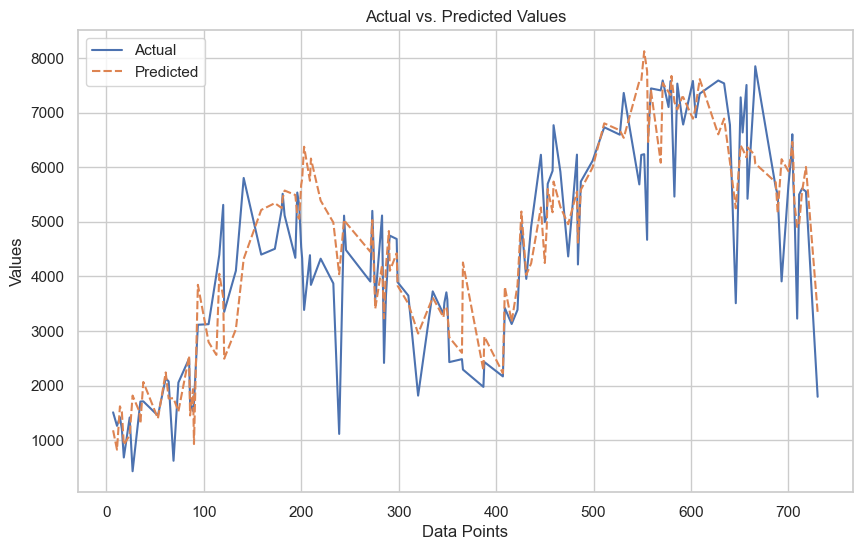

In [214]:
actualVsPredictChart(Y_test, pred["PassiveAggressiveRegressor"].to_numpy())

## Model Tuning ##

In [215]:
def eval_model(scaling_method):

    def eval_model_params(C, epsilon):

        # Fit Model
        nonlocal X_train, Y_train, X_test, X_train
        model = skl.PassiveAggressiveRegressor(C=C, epsilon=epsilon)
        model.fit(X_train, Y_train)

        # Get Model Scores
        sc = model.score(X_train, Y_train)
        y_pred = model.predict(X_test)
        r2 = skm.r2_score(Y_test, y_pred)
        rmse = np.sqrt(skm.mean_squared_error(Y_test, y_pred))
        mae = skm.mean_absolute_error(Y_test, y_pred)

        # Return Values
        return [C, epsilon, sc, r2, rmse, mae, model, Y_test, y_pred]

    # Data Scaling
    X_train = scaling_method.fit_transform(X=data_train.drop(columns=["dteday", "casual", "registered", "cnt"]))
    Y_train = data_train["cnt"].copy()
    X_test = scaling_method.transform(data_test.drop(columns=["dteday", "casual", "registered", "cnt"]))
    Y_test = data_test["cnt"].copy()

    # Parameters
    Cs = [1.5**x for x in range(-5, 5)]
    epsilons = [0.05*x for x in range(201)]

    results = pd.DataFrame(
        columns=["method", "C", "epsilon", "score", "R squared", "RMSE", "MAE", "model", "ytest", "ypred"])
    for C in Cs:
        for eps in epsilons:
            eval_params = eval_model_params(C, eps)
            results.loc[len(results)] = [repr(scaling_method), *eval_params]
    return results.sort_values("R squared", ascending=False).iloc[0].copy()

In [216]:
list_scalers = [
    skp.KBinsDiscretizer,
    skp.MaxAbsScaler,
    skp.MinMaxScaler,
    skp.Normalizer,
    skp.PolynomialFeatures,
    skp.QuantileTransformer,
    skp.StandardScaler,
    skp.SplineTransformer,
    skp.PowerTransformer
]

results = pd.DataFrame(columns=["method", "C", "epsilon", "score", "R squared", "RMSE", "MAE", "model", "ytest", "ypred"])

for func in list_scalers:
    print(f"Using method: {repr(func)}")
    results.loc[len(results)] = eval_model(scaling_method=func())

Using method: <class 'sklearn.preprocessing._discretization.KBinsDiscretizer'>
Using method: <class 'sklearn.preprocessing._data.MaxAbsScaler'>
Using method: <class 'sklearn.preprocessing._data.MinMaxScaler'>
Using method: <class 'sklearn.preprocessing._data.Normalizer'>
Using method: <class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>
Using method: <class 'sklearn.preprocessing._data.QuantileTransformer'>
Using method: <class 'sklearn.preprocessing._data.StandardScaler'>
Using method: <class 'sklearn.preprocessing._polynomial.SplineTransformer'>
Using method: <class 'sklearn.preprocessing._data.PowerTransformer'>


In [217]:
res_y_test = results.sort_values("MAE", ascending=True).iloc[0, 8]
res_y_pred = results.sort_values("MAE", ascending=True).iloc[0, 9]

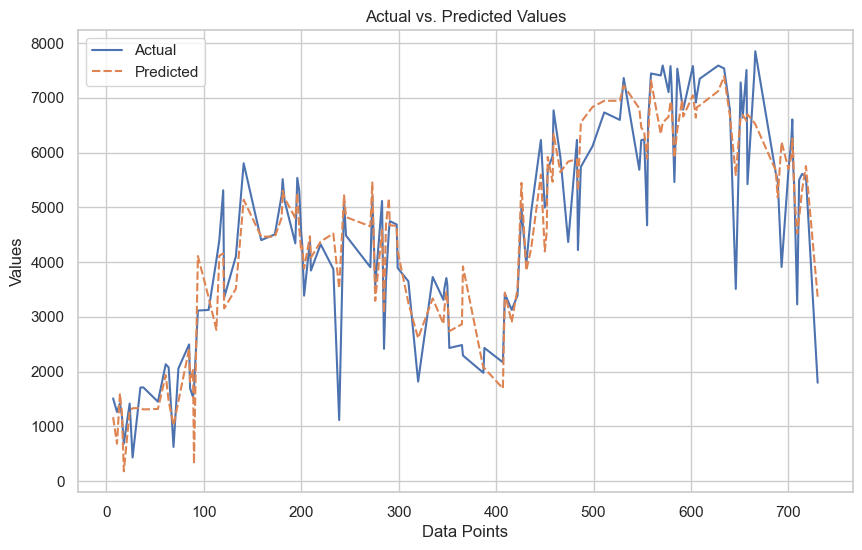

In [218]:
actualVsPredictChart(res_y_test, res_y_pred)

<Axes: xlabel='cnt'>

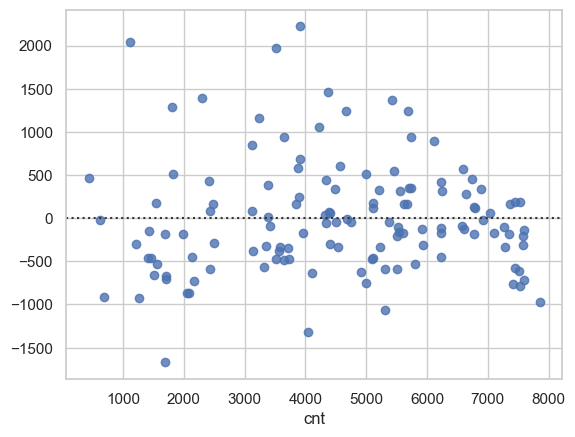

In [219]:
sns.residplot(x=res_y_test, y=res_y_pred)

Das originale Modell hatte einen R² von 0.6 -> 0.88 <br>
MAE war ~802 -> 507

In [220]:
results.iloc[:, :8].sort_values("MAE")

,method,C,epsilon,score,R squared,RMSE,MAE,model
7,SplineTransformer(),3.38,8.75,0.34,0.88,682.77,506.99,"PassiveAggressiveRegressor(C=3.375, epsilon=8.75)"
6,StandardScaler(),5.06,2.25,0.30,0.79,904.88,654.91,"PassiveAggressiveRegressor(C=5.0625, epsilon=2..."
2,MinMaxScaler(),0.67,2.55,0.29,0.78,915.70,658.50,PassiveAggressiveRegressor(C=0.666666666666666...
8,PowerTransformer(),5.06,5.60,0.30,0.78,919.34,672.22,"PassiveAggressiveRegressor(C=5.0625, epsilon=5..."
5,QuantileTransformer(),2.25,5.70,0.29,0.79,903.16,672.61,"PassiveAggressiveRegressor(C=2.25, epsilon=5.7)"
1,MaxAbsScaler(),5.06,6.05,0.29,0.78,913.35,673.85,"PassiveAggressiveRegressor(C=5.0625, epsilon=6..."
0,KBinsDiscretizer(),0.67,1.90,0.20,0.47,1418.83,1195.17,PassiveAggressiveRegressor(C=0.666666666666666...
4,PolynomialFeatures(),3.38,6.45,0.06,0.17,1783.48,1400.63,"PassiveAggressiveRegressor(C=3.375, epsilon=6.45)"
3,Normalizer(),5.06,4.25,-0.00,0.00,1949.32,1637.93,"PassiveAggressiveRegressor(C=5.0625, epsilon=4..."
